### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 386_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,...,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,0.046118,0.243559,0.501138,1.122885,1.475560,3.914391,1.283172,1.071185,1.018775,1.006550,...,1.852068,1.875850,1.998390,2.031717,0.951815,1.587340,1.960886,2.041494,1.975397,39.258095
std,0.014031,0.014712,0.021105,0.020493,0.013001,3.443804,0.215297,0.034892,0.003712,0.002183,...,0.025017,0.018755,0.015668,0.037695,0.086142,0.027845,0.028389,0.013300,0.008486,16.444629
min,0.011448,0.163293,0.461665,1.098375,1.280140,1.674053,1.026392,1.041001,0.870759,0.953378,...,1.597915,1.828354,1.870008,1.682571,0.400662,1.335390,1.661121,1.864549,1.868127,22.900000
25%,0.035963,0.239421,0.488399,1.108808,1.467327,2.090549,1.201410,1.055910,1.017491,1.005734,...,1.844887,1.863777,1.994470,2.030424,0.917749,1.578151,1.953149,2.041472,1.973603,30.300000
50%,0.050468,0.244775,0.492902,1.113993,1.470554,2.726679,1.215567,1.059866,1.019499,1.006722,...,1.854396,1.873865,2.001548,2.041994,0.982455,1.589350,1.958305,2.042793,1.975965,34.300000
75%,0.055732,0.250329,0.504994,1.131498,1.483133,3.633429,1.246029,1.066887,1.020651,1.007222,...,1.863504,1.885463,2.006900,2.049410,1.012142,1.600397,1.966005,2.044075,1.978096,39.300000
max,0.094856,0.322910,0.643500,1.219879,1.520516,26.630747,3.186816,1.684831,1.040872,1.093100,...,1.911245,1.976703,2.044710,2.068290,1.071741,1.681084,2.038860,2.059714,2.027883,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

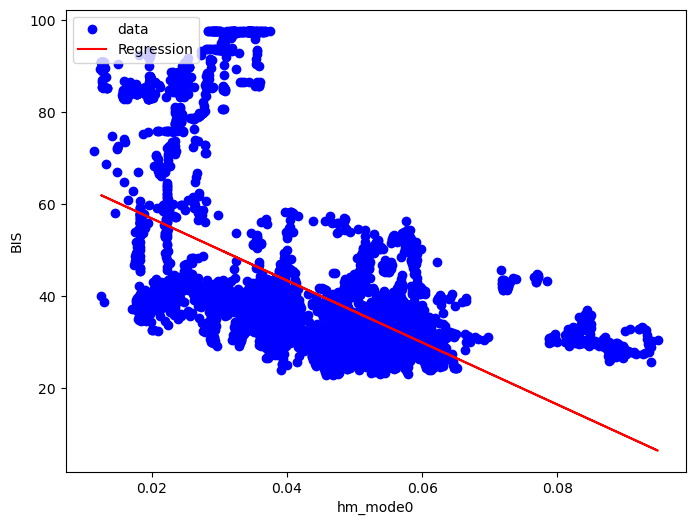

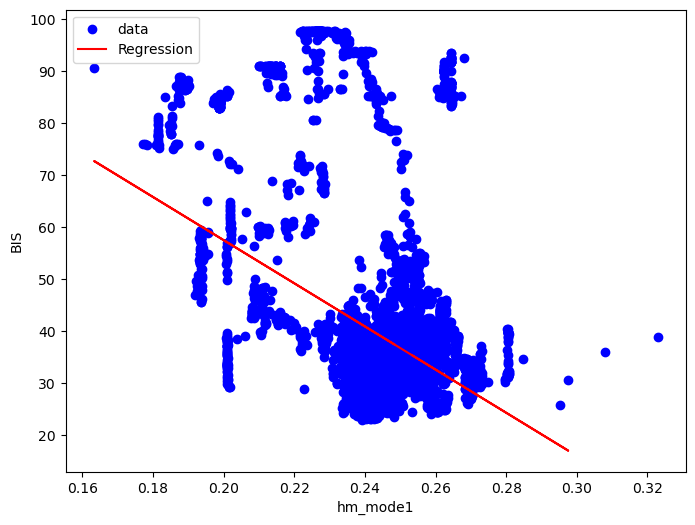

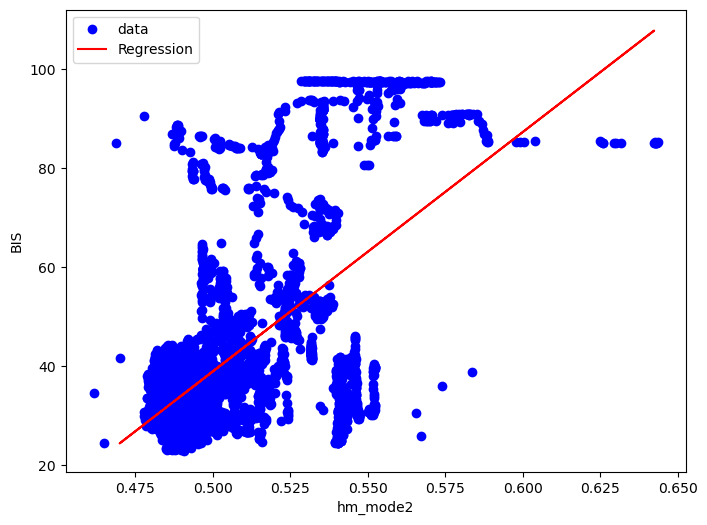

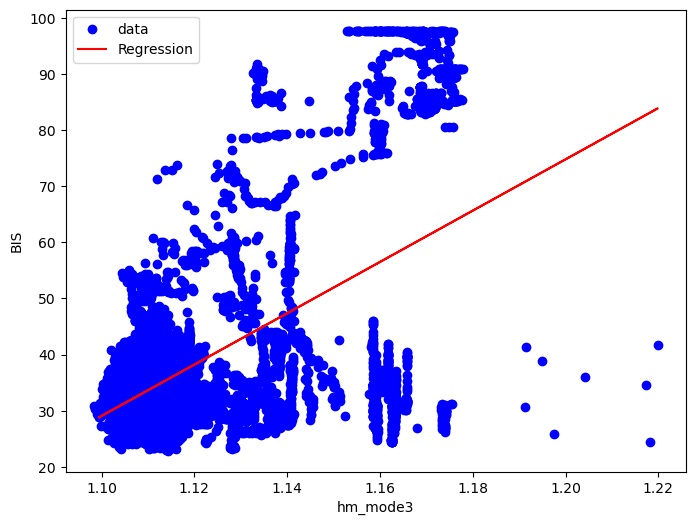

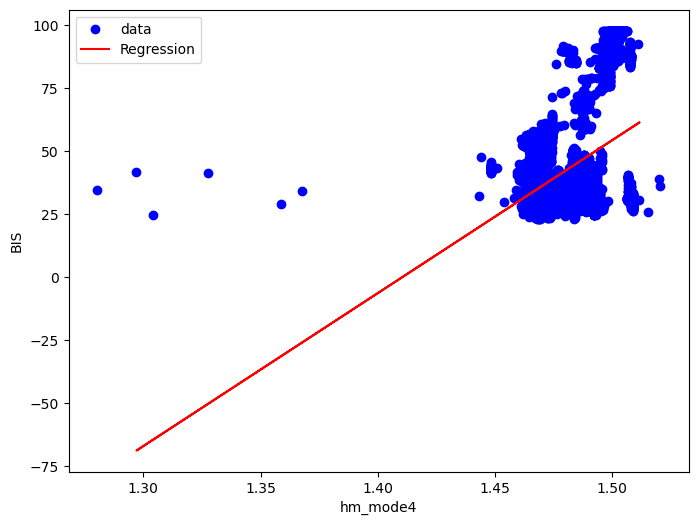

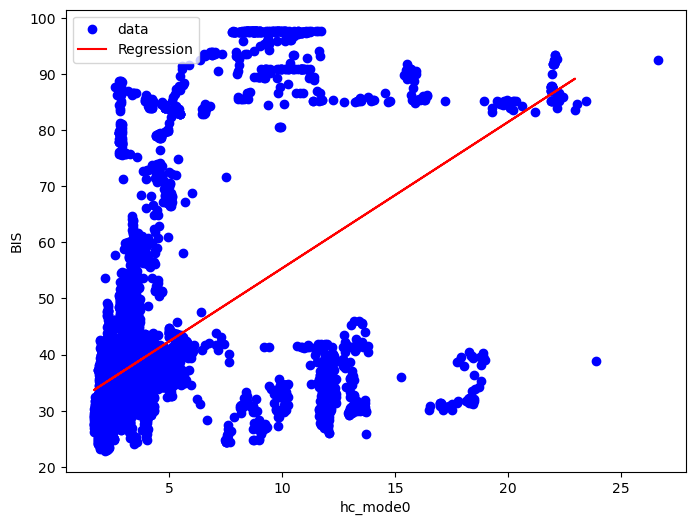

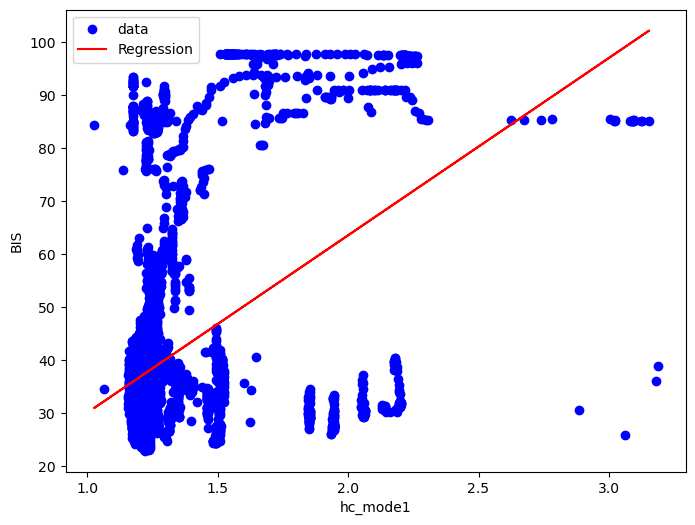

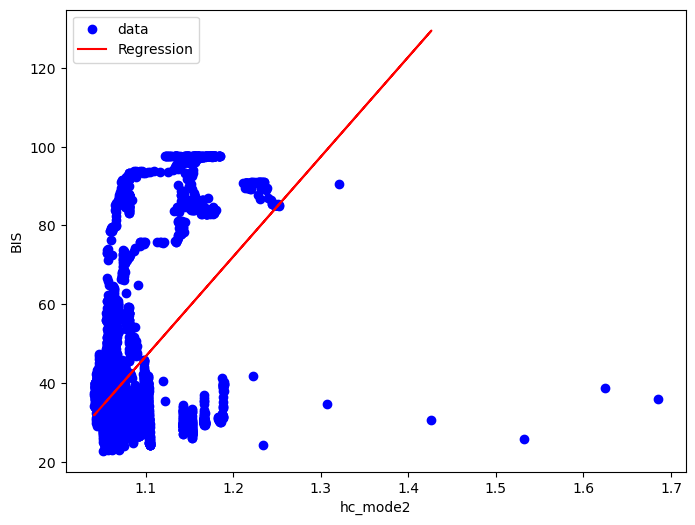

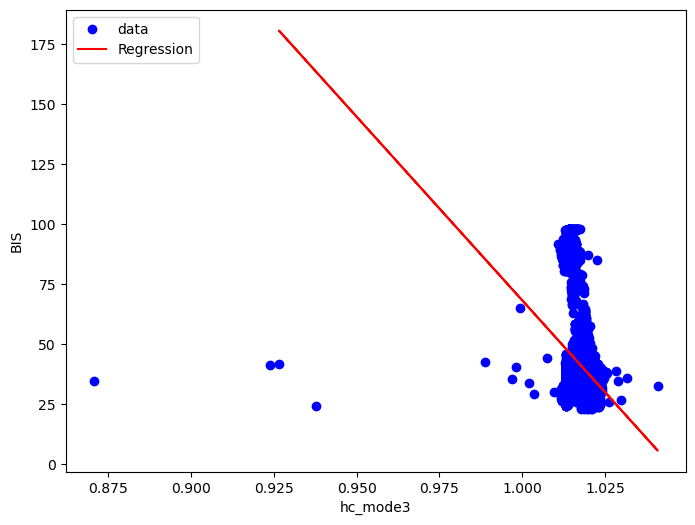

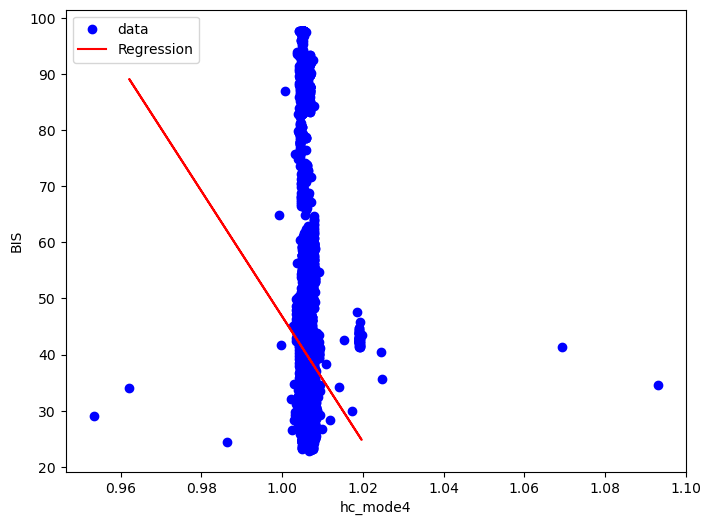

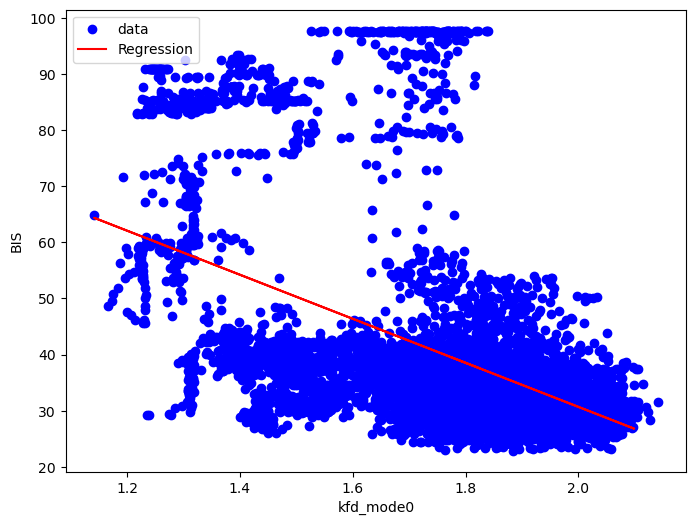

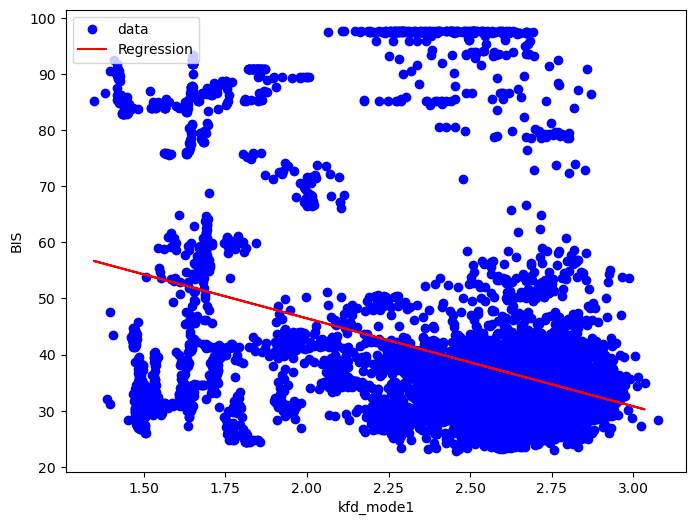

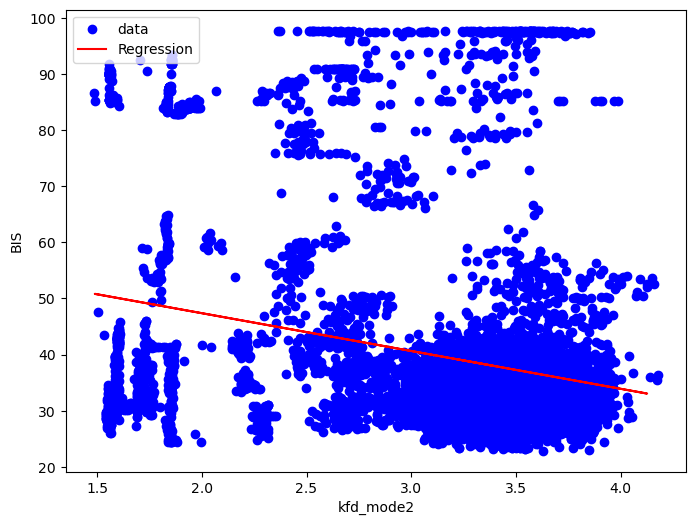

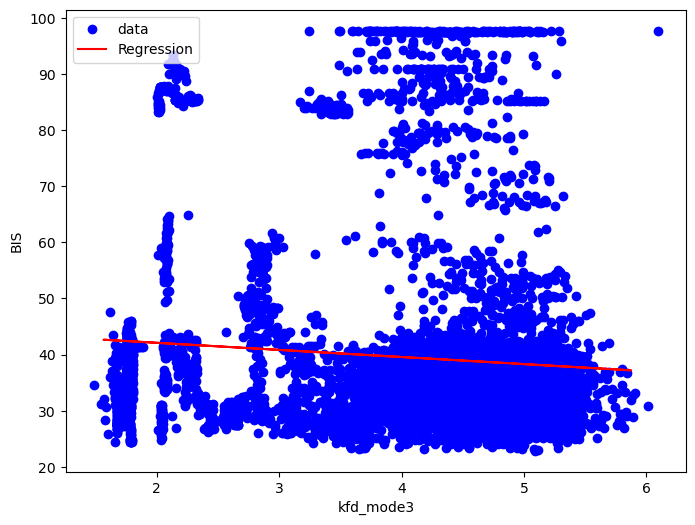

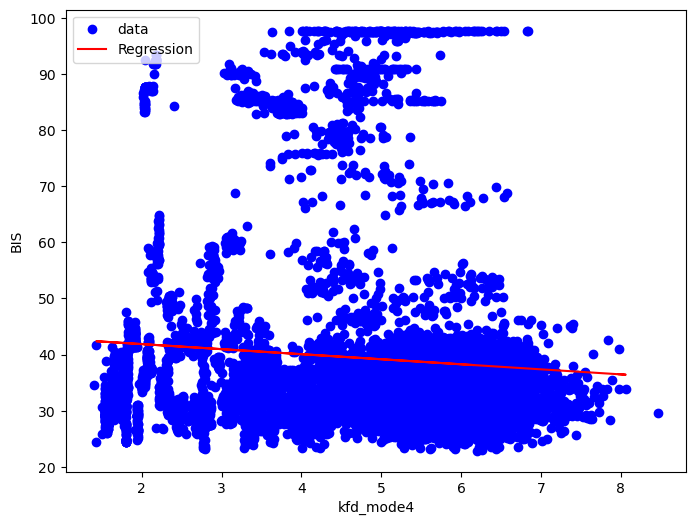

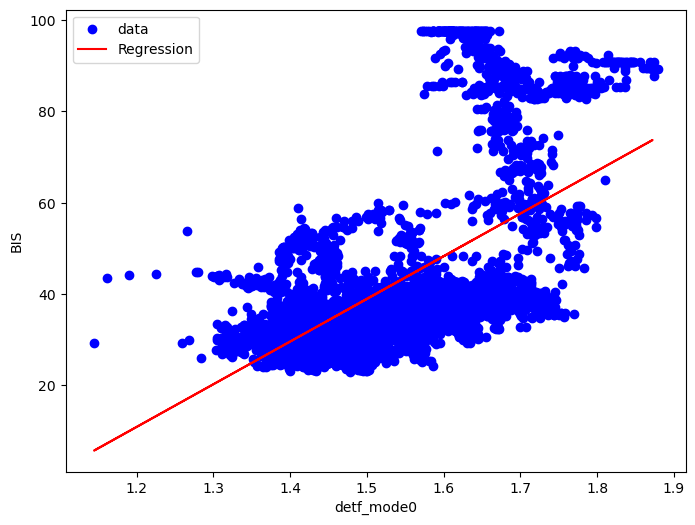

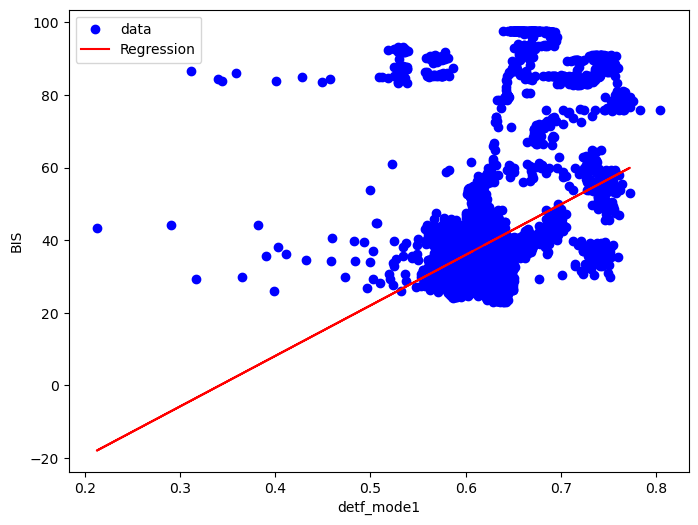

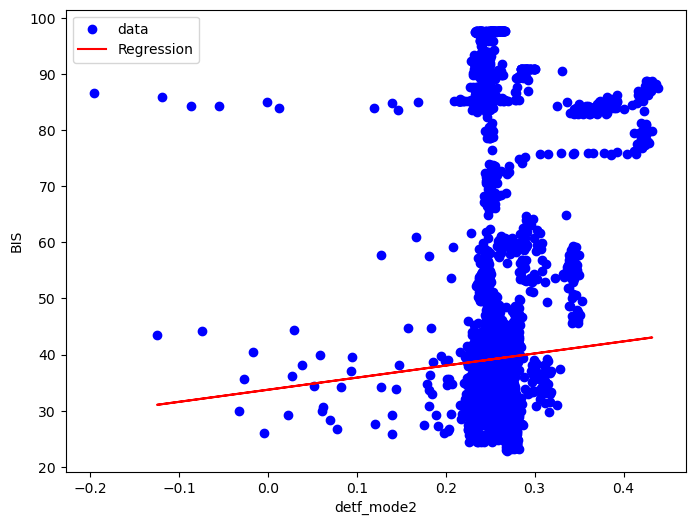

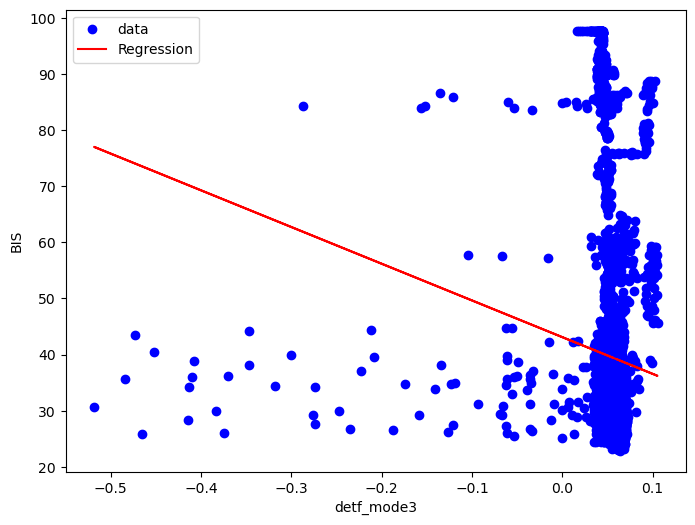

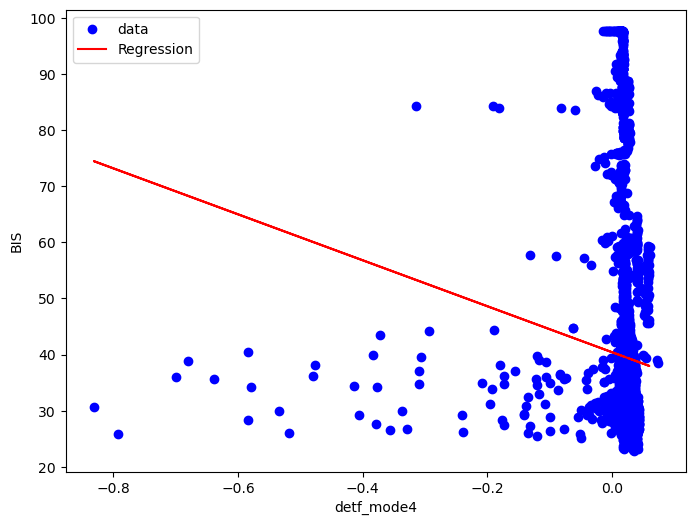

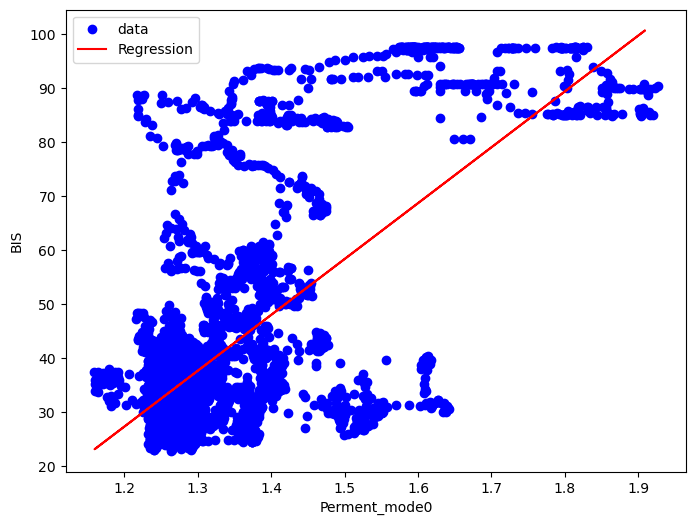

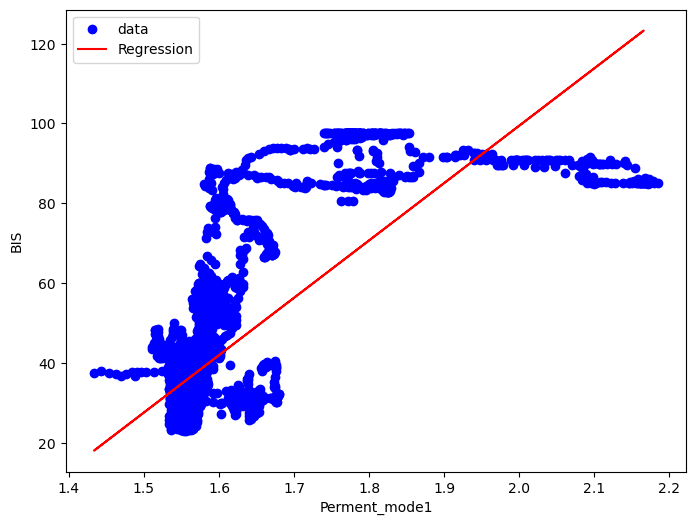

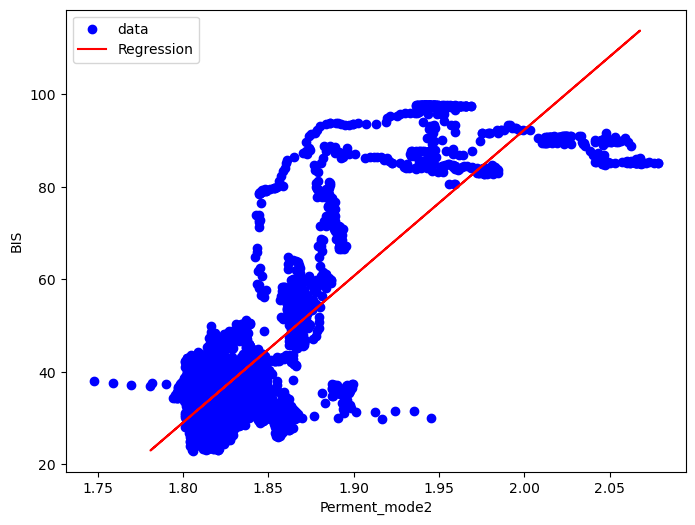

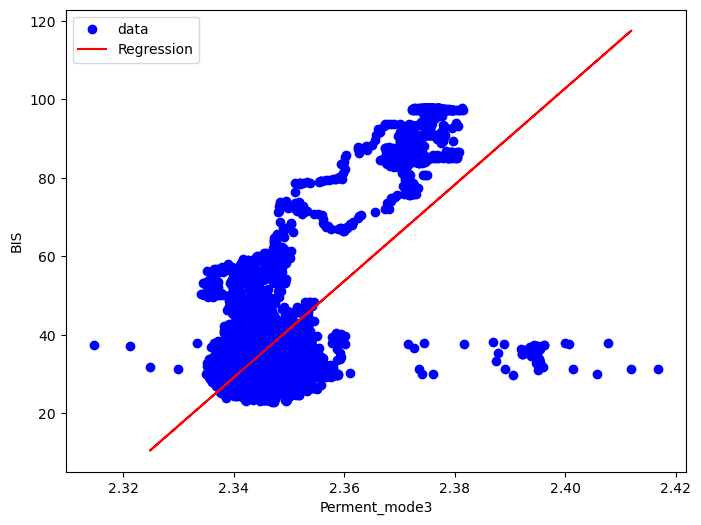

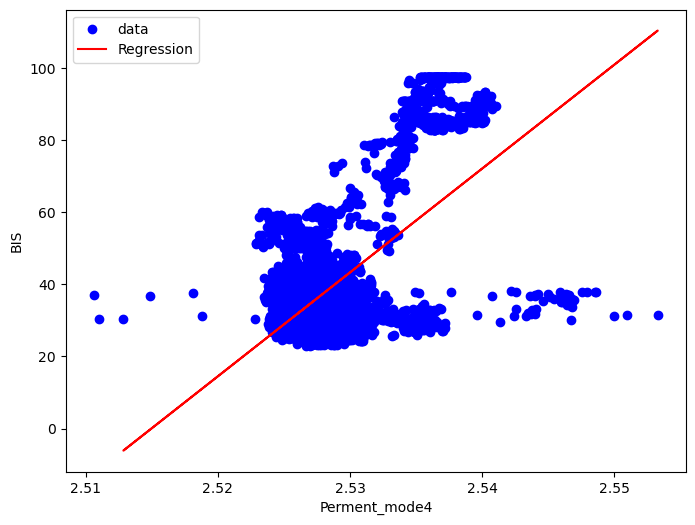

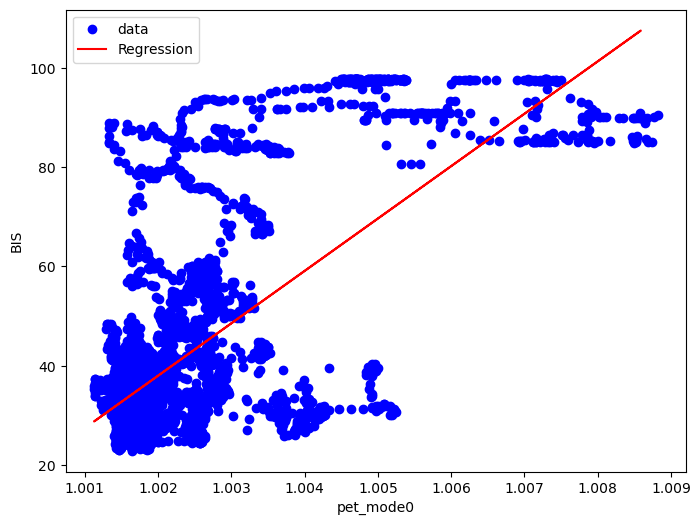

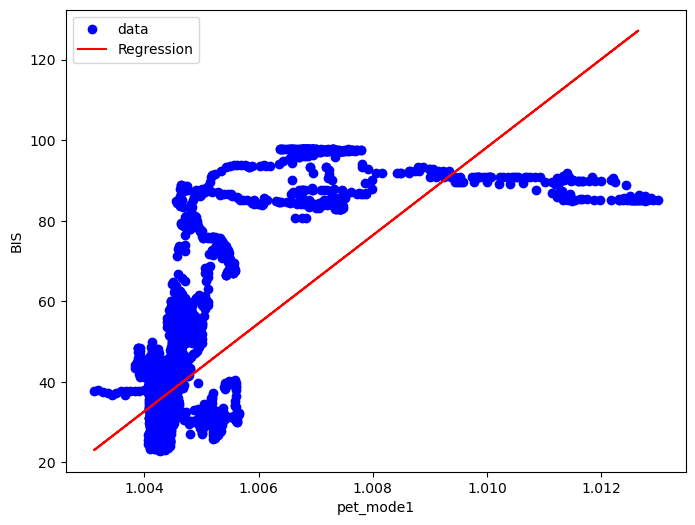

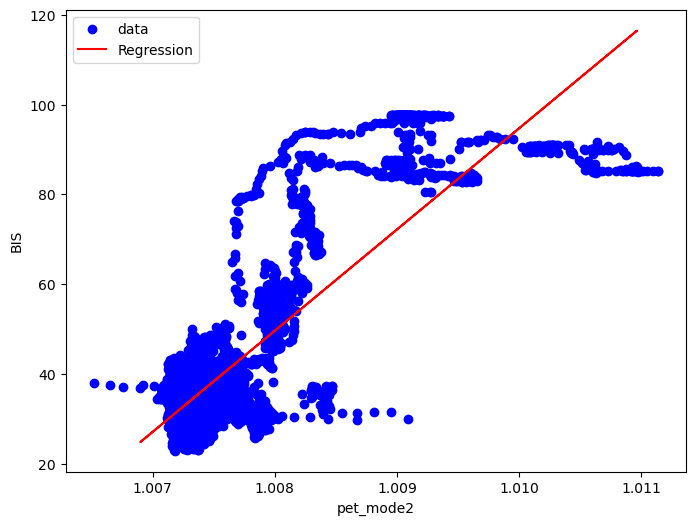

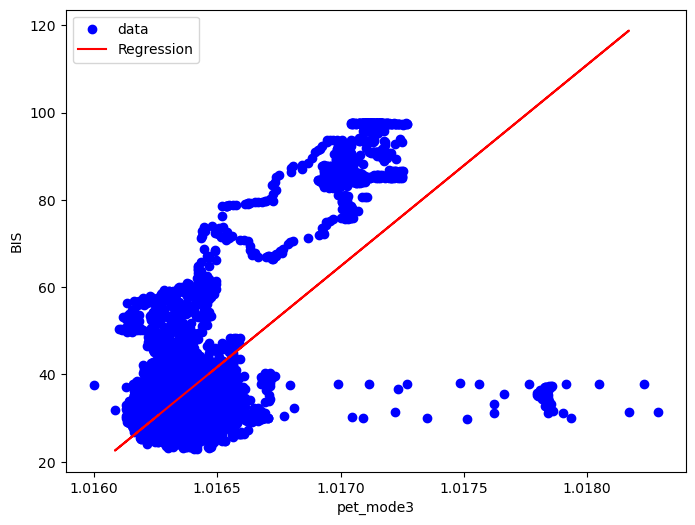

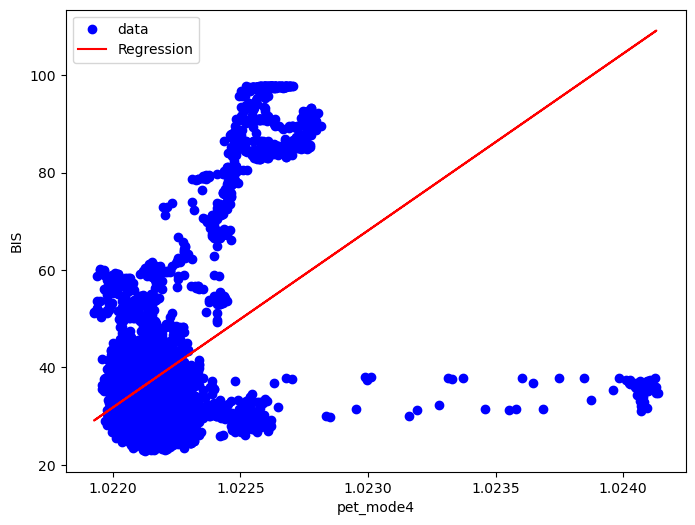

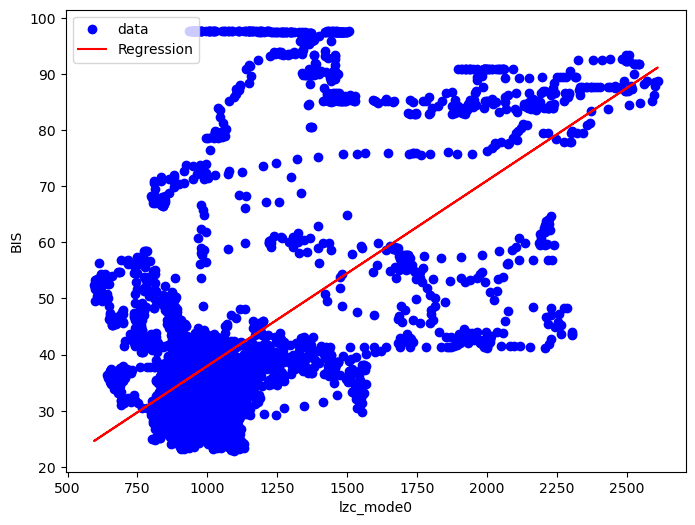

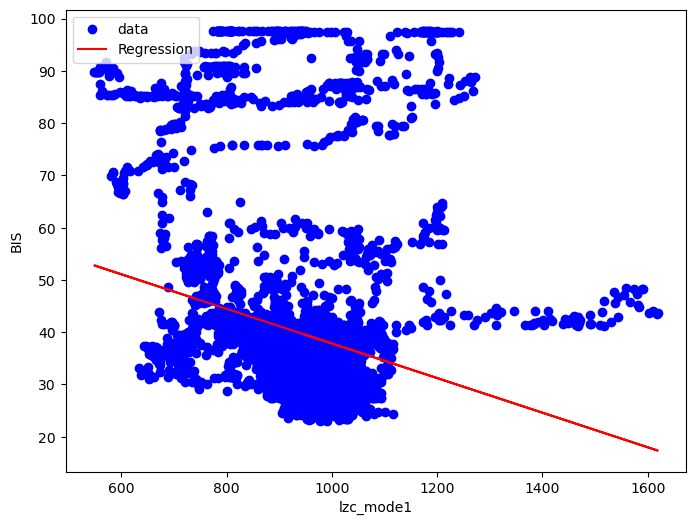

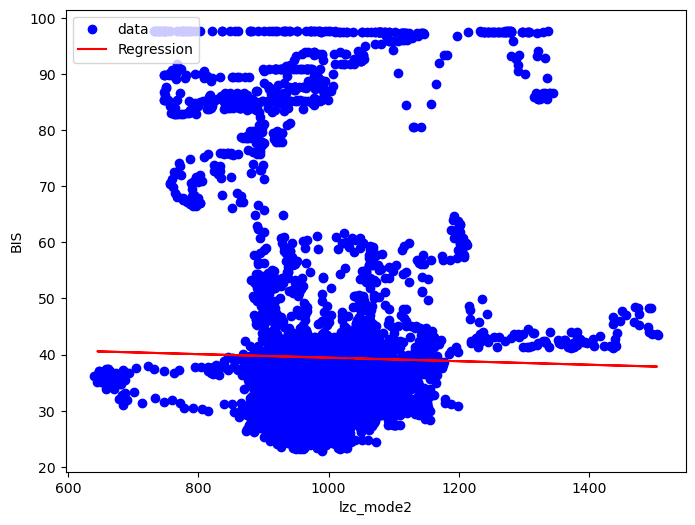

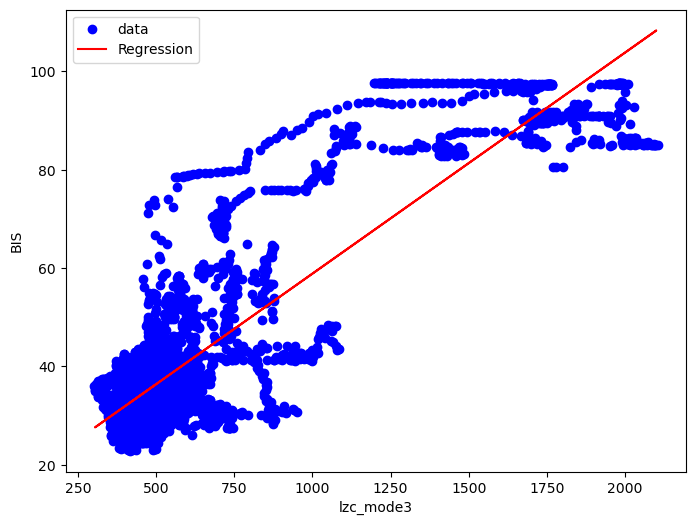

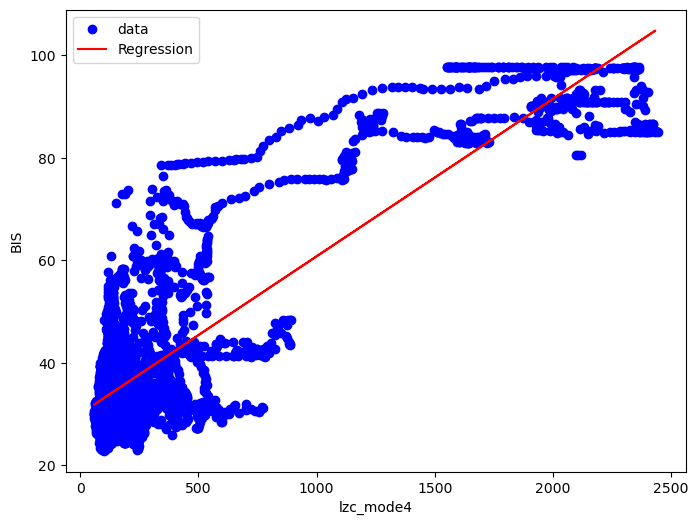

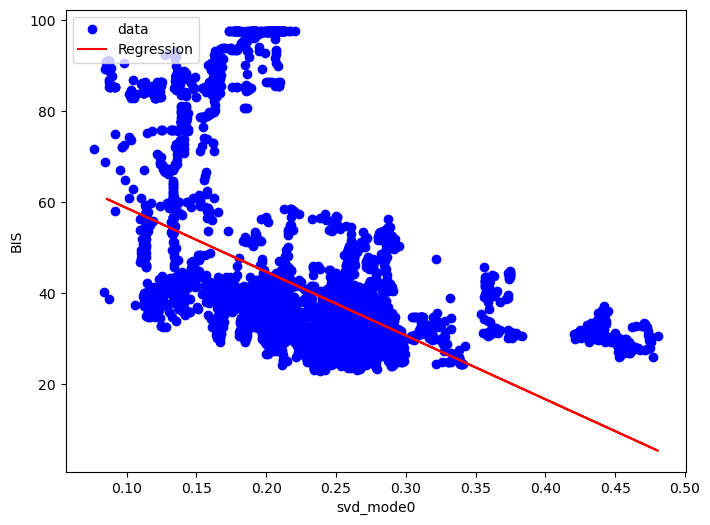

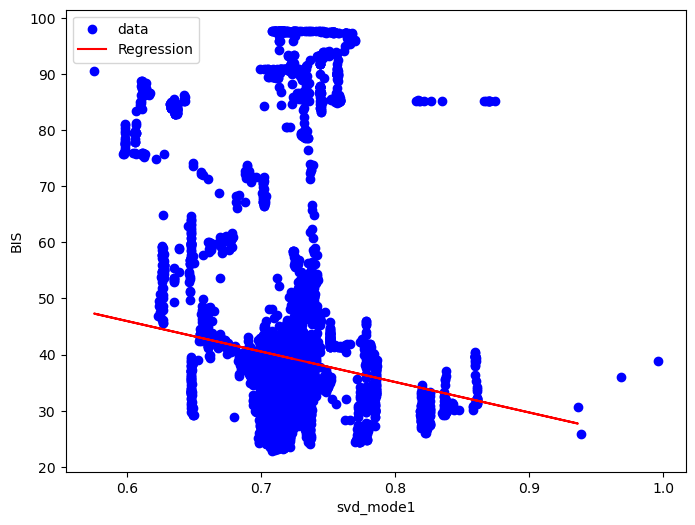

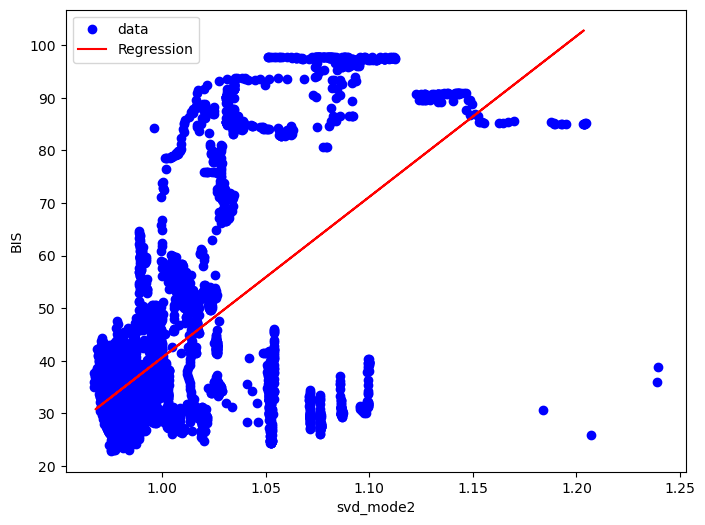

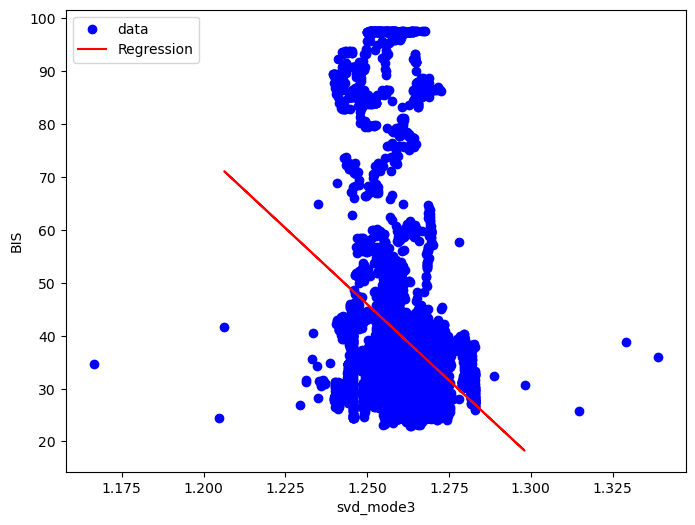

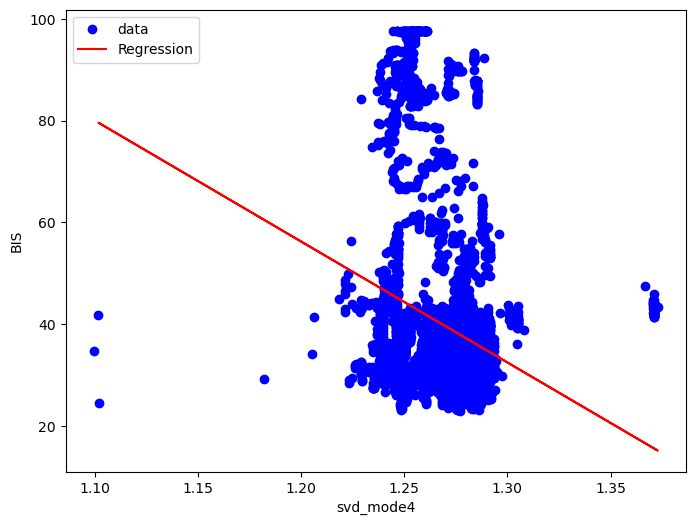

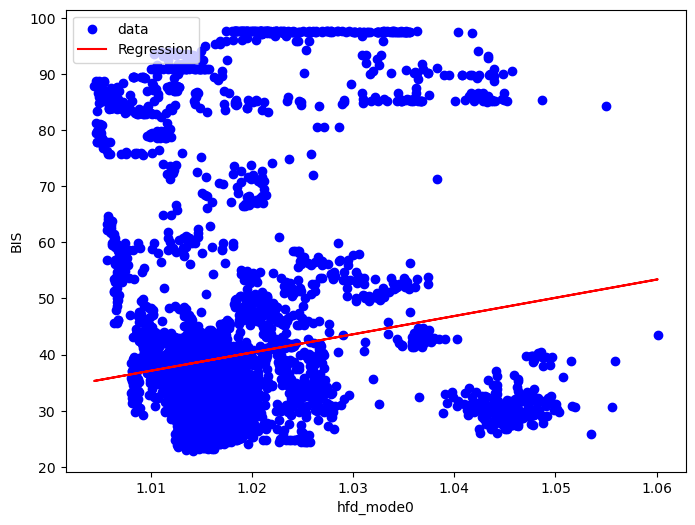

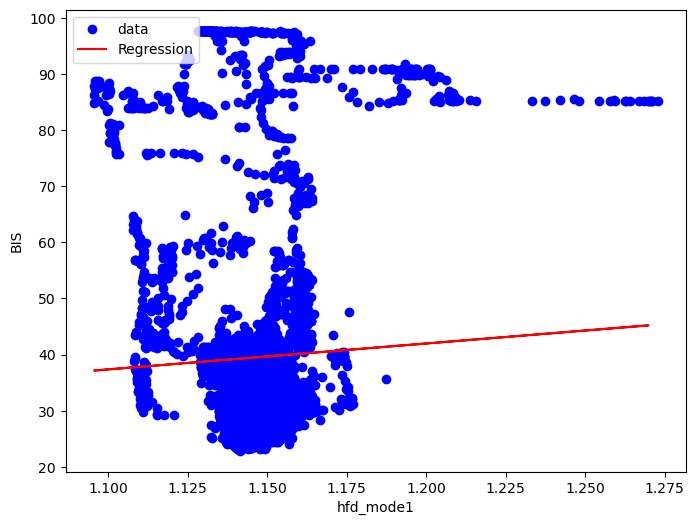

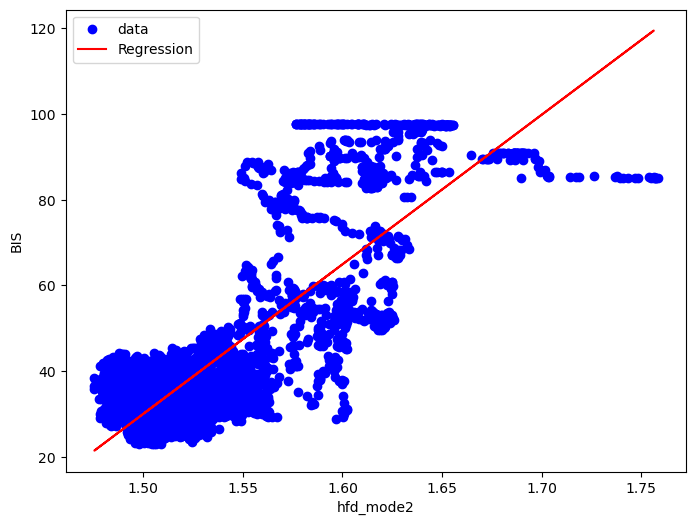

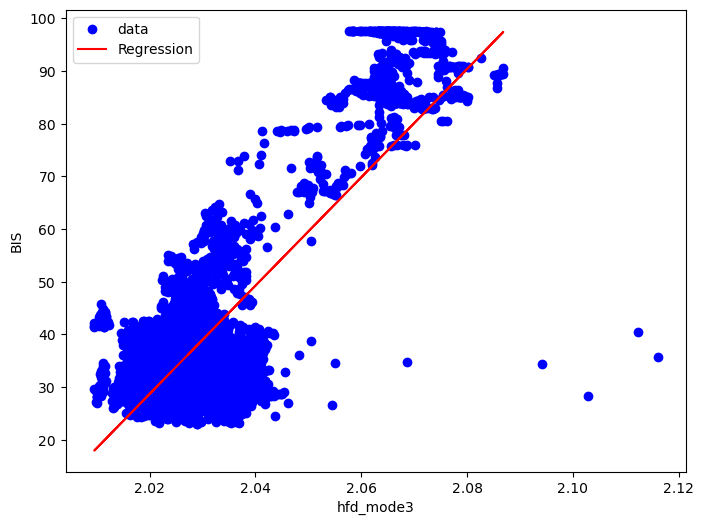

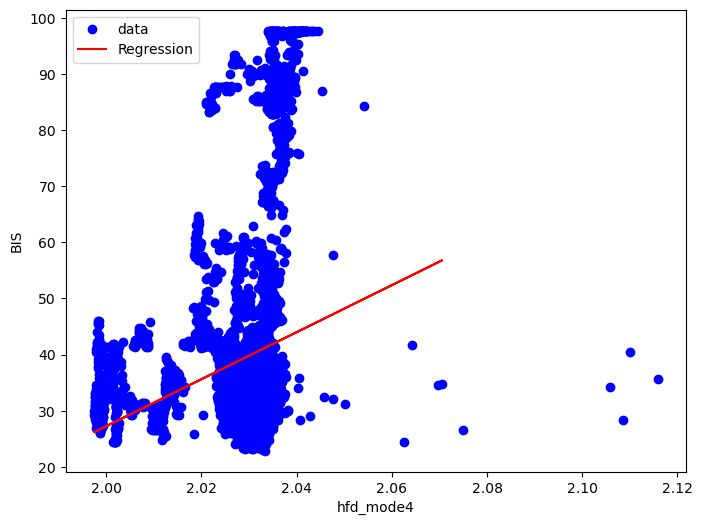

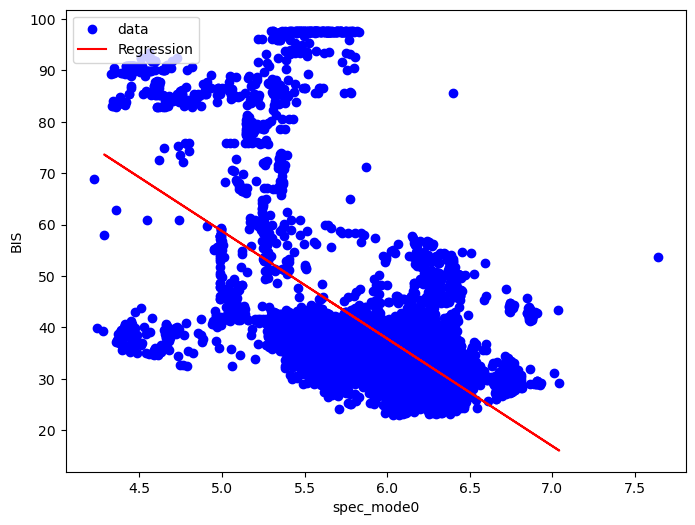

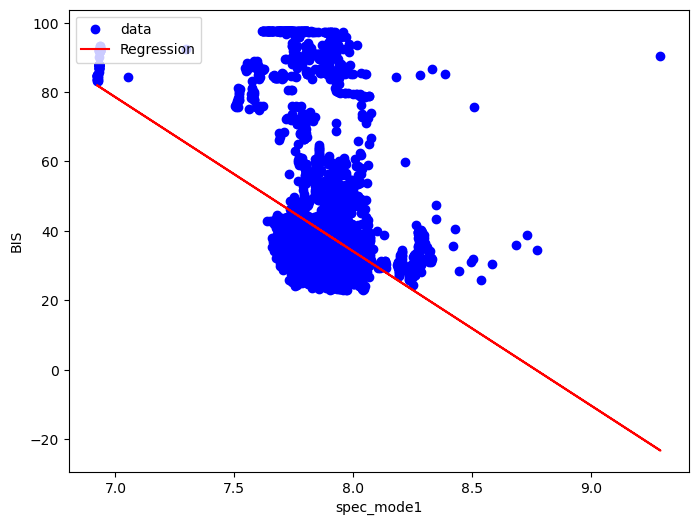

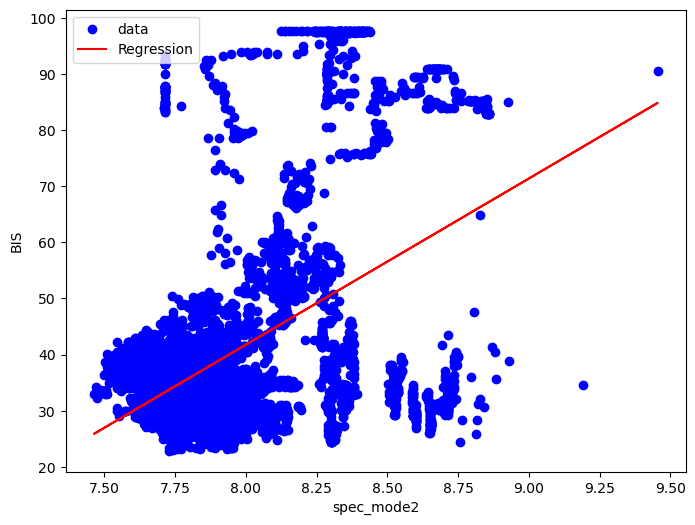

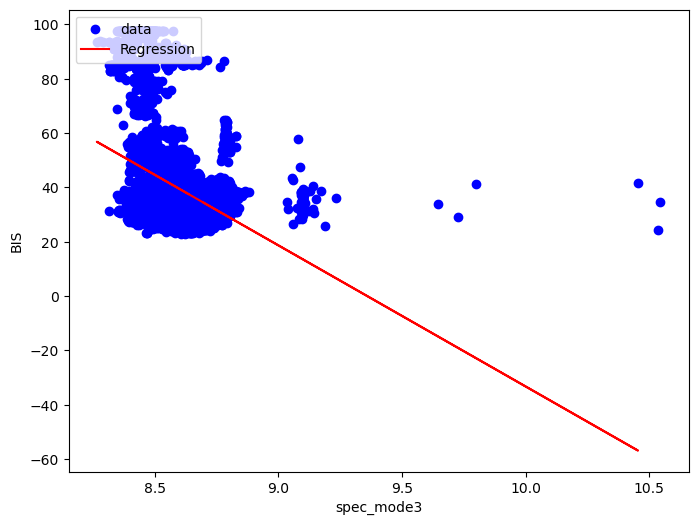

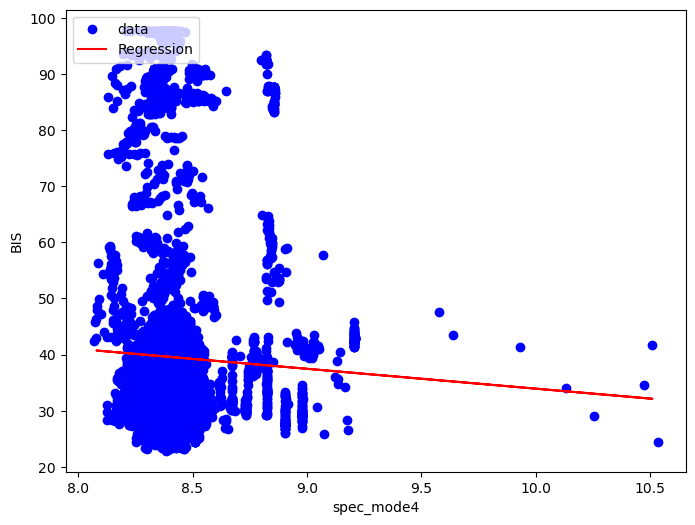

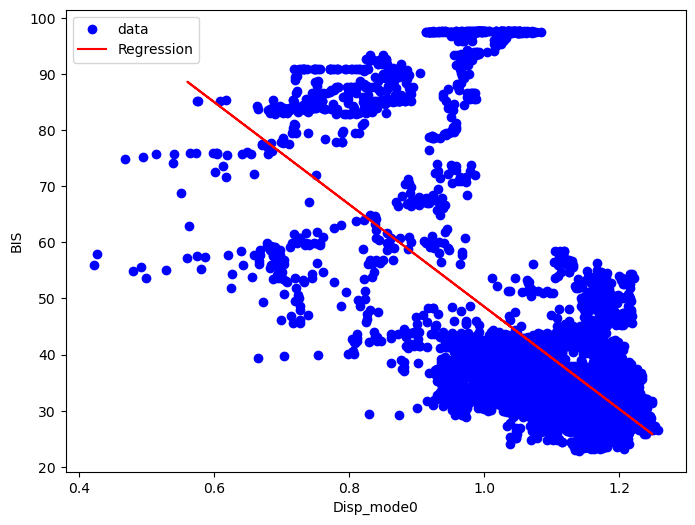

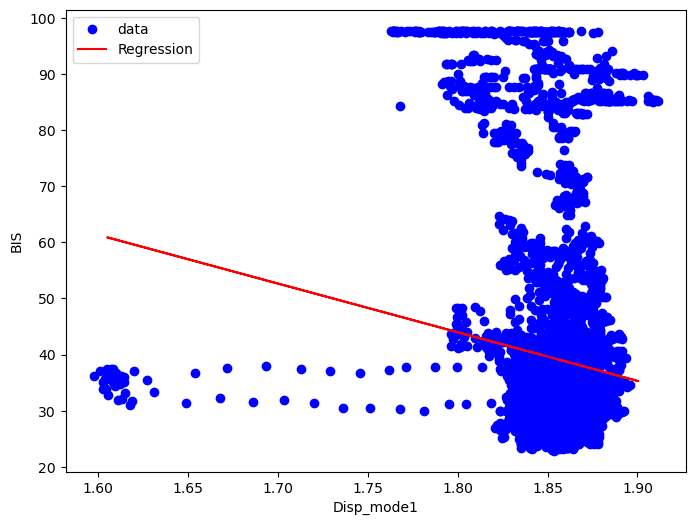

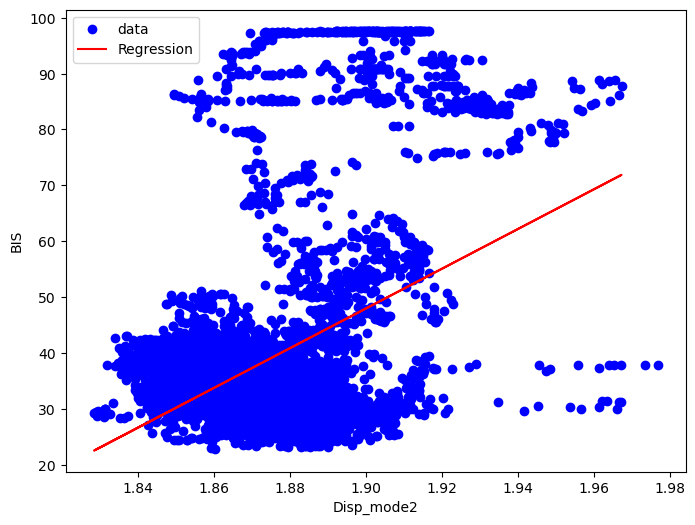

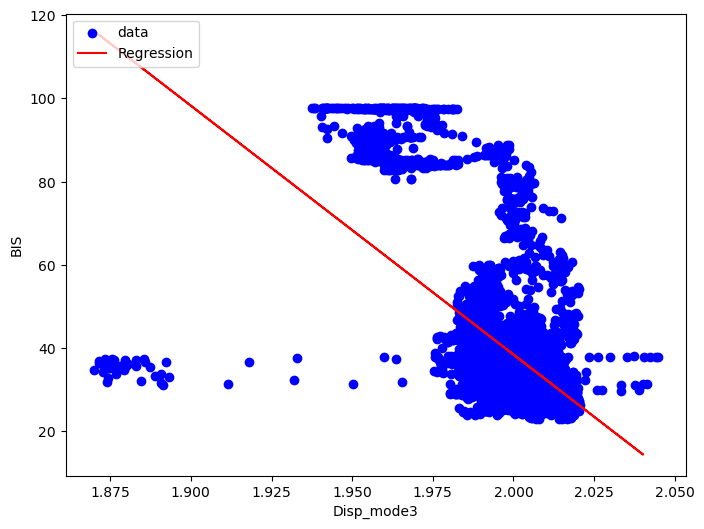

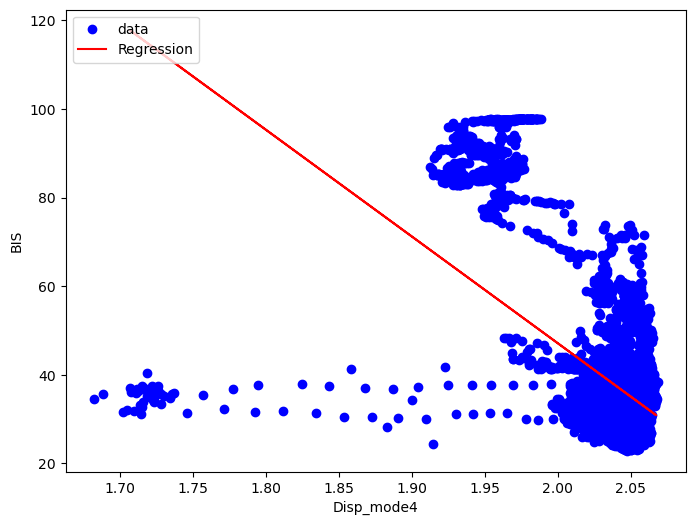

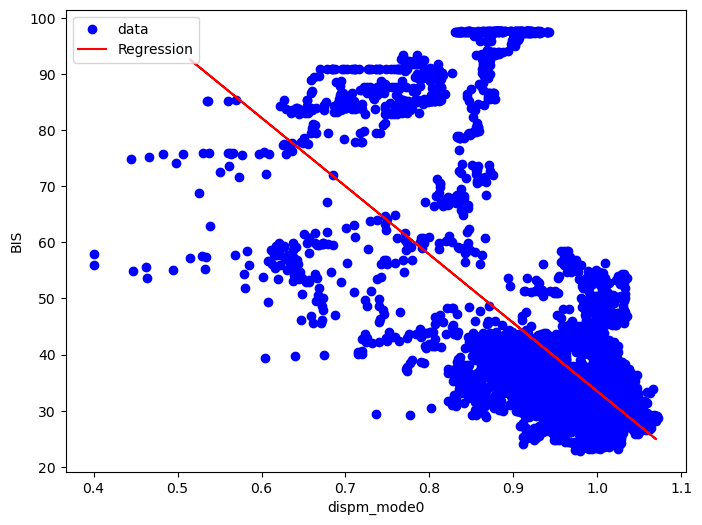

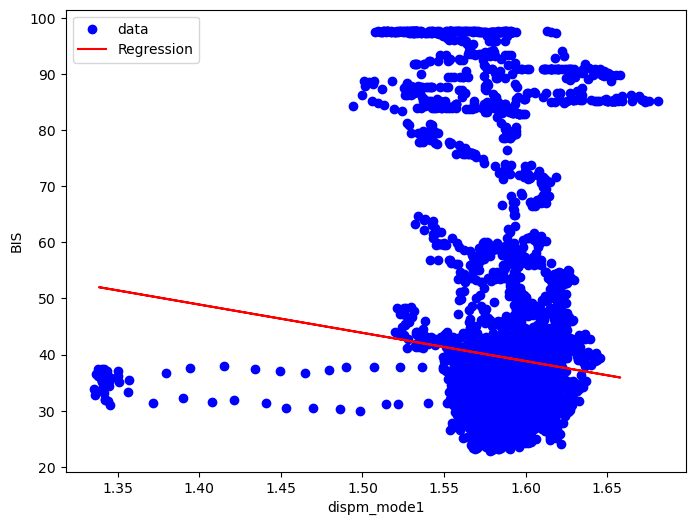

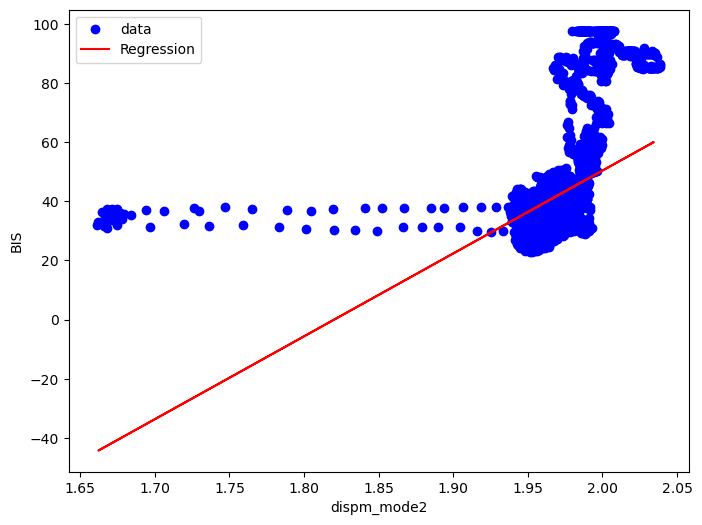

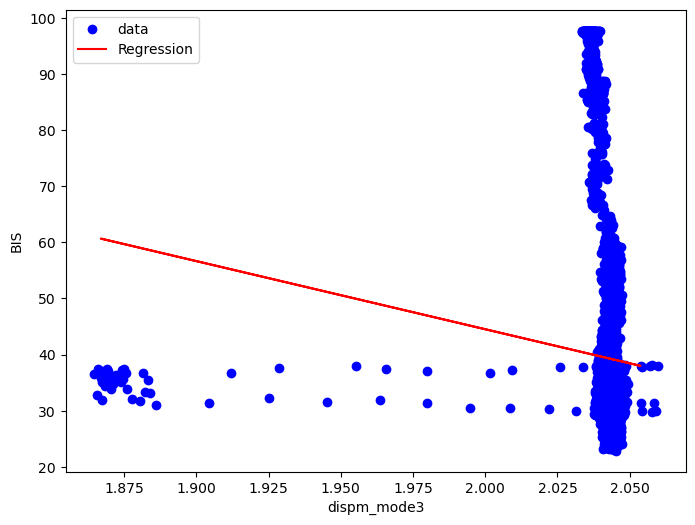

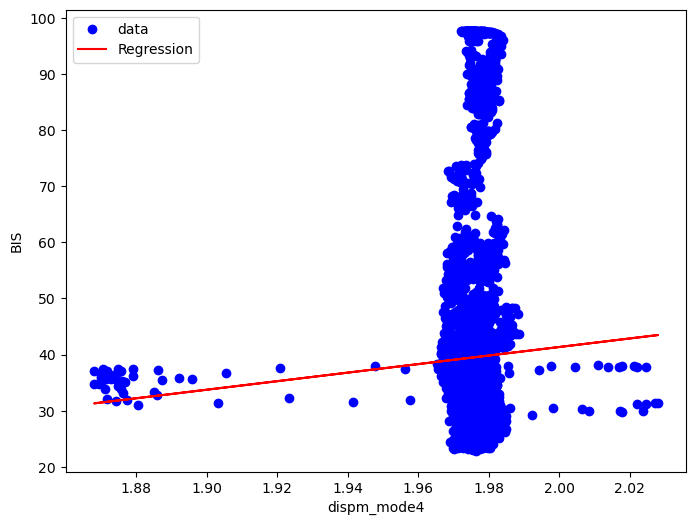

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
33,lzc_mode3_r2,77.344488
34,lzc_mode4_r2,77.330954
22,Perment_mode2_r2,70.737692
27,pet_mode2_r2,69.915330
43,hfd_mode3_r2,64.494176
42,hfd_mode2_r2,64.097795
21,Perment_mode1_r2,59.372880
26,pet_mode1_r2,55.303998
23,Perment_mode3_r2,47.513237
50,Disp_mode0_r2,44.841272


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
43      hfd_mode3    0.809323
57    dispm_mode2    0.035197
42      hfd_mode2    0.027065
15     detf_mode0    0.017725
29      pet_mode4    0.010277
0        hm_mode0    0.008475
33      lzc_mode3    0.006336
31      lzc_mode1    0.005648
53     Disp_mode3    0.005470
34      lzc_mode4    0.004562
22  Perment_mode2    0.003923
52     Disp_mode2    0.003534
50     Disp_mode0    0.003412
45     spec_mode0    0.003389
30      lzc_mode0    0.003079
55    dispm_mode0    0.002638
1        hm_mode1    0.002573
32      lzc_mode2    0.002524
4        hm_mode4    0.002149
7        hc_mode2    0.002110
35      svd_mode0    0.002047
23  Perment_mode3    0.001771
51     Disp_mode1    0.001558
2        hm_mode2    0.001547
24  Perment_mode4    0.001543
28      pet_mode3    0.001542
27      pet_mode2    0.001394
56    dispm_mode1    0.001357
10      kfd_mode0    0.001301
48     spec_mode3    0.001278
14      kfd_mode4    0.001250
21  Perment_mode1    0.001218
36      sv